# All Types of Argo/EM-APEX Velocity Graphs (Built-In + My Own Flare)

In [1]:
#All the imports I utalized to allow any code to run across any of my notebooks, mostly for Argo data
import xarray as xr
xr.set_options(display_style="html", display_expand_attrs=False);
from matplotlib import pyplot as plt
plt.style.use('default')
import cartopy
import cartopy.crs as ccrs
import argopy
import numpy as np
import os, shutil
import pandas as pd
from pathlib import Path
import seawater as sw

from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(src='erddap', parallel=True)

from argopy import IndexFetcher as ArgoIndexFetcher

from argopy.plot import scatter_map
from argopy import IndexFetcher as ArgoIndexFetcher
from argopy import OceanOPSDeployments
from argopy import TopoFetcher

Don't forget to update the paths and upload the EM-APEX velocity data with alterations!

In [2]:
#This is of ALL EM-APEX data of all 3 Regions.
EM_APEX_Velocity2017 = r"C:\Users\lily\Documents\ElizabethFiles2023\DINO SIP Documents\vel_gps_interpolated_smile2017only.parquet"
EM_APEX_Vdata3_df = pd.read_parquet(EM_APEX_Velocity2017)
EM_APEX_Vdata3_df['u'] = EM_APEX_Vdata3_df.apply(lambda row: (row['u1'] + row['u2']) / 2, axis=1)
EM_APEX_Vdata3_df['v'] = EM_APEX_Vdata3_df.apply(lambda row: (row['v1'] + row['v2']) / 2, axis=1)
EM_APEX_Vdata3_df

,LAT,LON,deployment,experiment,dive_nbr,P,T,S,u1,v1,...,u2,v2,verr2,W,e1mean,e2mean,piston,uxt,u,v
UXT_DT,,,,,,,,,,,,,,,,,,,,,
2017-03-08 04:51:13+00:00,26.236990,-146.269022,4968s1,SMILE,0001,38.40000,20.394000,35.209000,0.237,-0.158000,...,0.219,-0.115000,0.007,0.159000,1360.9,-1049.4,9.0,1.488949e+09,0.2280,-0.136500
2017-03-08 04:51:40+00:00,26.237970,-146.269244,4968s1,SMILE,0001,42.60000,20.355000,35.205000,0.207,-0.157000,...,0.202,-0.122000,0.007,0.154000,1360.3,-1049.3,9.0,1.488949e+09,0.2045,-0.139500
2017-03-08 04:52:05+00:00,26.238877,-146.269449,4968s1,SMILE,0001,46.40000,20.330000,35.205000,0.176,-0.150000,...,0.178,-0.122000,0.007,0.154000,1359.7,-1049.3,9.0,1.488949e+09,0.1770,-0.136000
2017-03-08 04:52:30+00:00,26.239784,-146.269654,4968s1,SMILE,0001,50.20000,20.317000,35.204000,0.175,-0.148000,...,0.165,-0.119000,0.005,0.154000,1359.5,-1049.0,9.0,1.488949e+09,0.1700,-0.133500
2017-03-08 04:52:55+00:00,26.240218,-146.269709,4968s1,SMILE,0001,54.10000,20.300000,35.203000,0.160,-0.152000,...,0.154,-0.123000,0.007,0.153000,1359.4,-1048.4,9.0,1.488949e+09,0.1570,-0.137500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-30 03:31:08+00:00,35.199656,-139.709843,7808s3,SMILE,0224,14.60000,15.188000,33.948000,-0.067,0.065000,...,-0.083,0.101000,0.018,-0.127000,1110.7,-97.8,152.0,1.490845e+09,-0.0750,0.083000
2017-03-30 03:31:34+00:00,35.201414,-139.723036,7808s3,SMILE,0224,11.30000,15.257000,33.947000,-0.052,0.041000,...,-0.099,0.042000,0.019,-0.125000,1111.3,-98.7,152.0,1.490845e+09,-0.0755,0.041500
2017-03-30 03:31:59+00:00,35.203105,-139.735722,7808s3,SMILE,0224,8.20000,15.385000,33.946000,-0.030,0.048000,...,-0.060,-0.006000,0.025,-0.123000,1110.8,-99.6,152.0,1.490845e+09,-0.0450,0.021000


In [3]:
#This is for JUST Region #1 of EM-APEX SMILE data.
EM_APEX_Vdata_dfS1 = EM_APEX_Vdata3_df.loc[(EM_APEX_Vdata3_df["deployment"] == '4968s1')]
EM_APEX_Vdata_dfS1

,LAT,LON,deployment,experiment,dive_nbr,P,T,S,u1,v1,...,u2,v2,verr2,W,e1mean,e2mean,piston,uxt,u,v
UXT_DT,,,,,,,,,,,,,,,,,,,,,
2017-03-08 04:51:13+00:00,26.236990,-146.269022,4968s1,SMILE,0001,38.4,20.394,35.209,0.237,-0.158,...,0.219,-0.115,0.007,0.159,1360.9,-1049.4,9.0,1.488949e+09,0.2280,-0.1365
2017-03-08 04:51:40+00:00,26.237970,-146.269244,4968s1,SMILE,0001,42.6,20.355,35.205,0.207,-0.157,...,0.202,-0.122,0.007,0.154,1360.3,-1049.3,9.0,1.488949e+09,0.2045,-0.1395
2017-03-08 04:52:05+00:00,26.238877,-146.269449,4968s1,SMILE,0001,46.4,20.330,35.205,0.176,-0.150,...,0.178,-0.122,0.007,0.154,1359.7,-1049.3,9.0,1.488949e+09,0.1770,-0.1360
2017-03-08 04:52:30+00:00,26.239784,-146.269654,4968s1,SMILE,0001,50.2,20.317,35.204,0.175,-0.148,...,0.165,-0.119,0.005,0.154,1359.5,-1049.0,9.0,1.488949e+09,0.1700,-0.1335
2017-03-08 04:52:55+00:00,26.240218,-146.269709,4968s1,SMILE,0001,54.1,20.300,35.203,0.160,-0.152,...,0.154,-0.123,0.007,0.153,1359.4,-1048.4,9.0,1.488949e+09,0.1570,-0.1375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-11 19:29:21+00:00,25.668011,-145.547272,4968s1,SMILE,0128,22.9,21.706,35.222,0.092,0.220,...,0.121,0.220,0.012,-0.122,1393.8,-1828.6,138.0,1.489261e+09,0.1065,0.2200
2017-03-11 19:29:46+00:00,25.666689,-145.546777,4968s1,SMILE,0128,19.8,21.782,35.219,0.049,0.231,...,0.095,0.209,0.012,-0.123,1391.9,-1828.3,138.0,1.489261e+09,0.0720,0.2200
2017-03-11 19:30:12+00:00,25.665315,-145.546262,4968s1,SMILE,0128,16.6,21.814,35.218,0.042,0.249,...,0.127,0.229,0.014,-0.126,1390.4,-1827.7,138.0,1.489261e+09,0.0845,0.2390


And don't forget to update the paths of the ANDRO velocity data with alterations for the two focus floats 
- Region #1 = 5903608
- Region #3 = 4900816
But I only had enough time to focus on Region #1!

In [4]:
#This is for float 5903608

import netCDF4
import numpy as np
import xarray as xr
import pandas as pd
import re
from matplotlib import pyplot as plt
%matplotlib inline

ANDROFullData=r"C:\Users\lily\Documents\ElizabethFiles2023\DINO SIP Documents\ANDRO2022-91950.dat"
ANDRO_data = pd.read_csv(ANDROFullData, sep='\s+', header=None)
filtered_rows = ANDRO_data[ANDRO_data[34] == 5903608]

filtered_rows.rename(columns={0:"Longitude XD", 1:"Latitude YD", 6:"EastwardVelocityDeep", 7:"NorthwardVelocityDeep", 8:"EastwardErrorDeep", 9:"NorthwardErrorDeep", 10:"Longitude XS1", 11:"Latitude YS1", 13:"EastwardVelocitySurface1", 14:"NorthwardVelocitySurface1", 15:"EastwardErrorSurface1", 16:"NorthwardErrorSurface1", 17:"Longitude XS2", 18:"Latitude YS2", 20:"EastwardVelocitySurface2", 21:"NorthwardVelocitySurface2", 22:"EastwardErrorSurface2", 23:"NorthwardErrorSurface2", 34:"WMO Float Number"}, inplace=True)

filtered_columns = filtered_rows.loc[:,["Longitude XD", "Latitude YD", "EastwardVelocityDeep", "NorthwardVelocityDeep", "EastwardErrorDeep", "NorthwardErrorDeep", "Longitude XS1", "Latitude YS1", "EastwardVelocitySurface1", "NorthwardVelocitySurface1", "EastwardErrorSurface1", "NorthwardErrorSurface1", "Longitude XS2", "Latitude YS2", "EastwardVelocitySurface2", "NorthwardVelocitySurface2", "EastwardErrorSurface2", "NorthwardErrorSurface2", "WMO Float Number"]]

#And then I went ahead and filtered the ANDRO float data for 5903608 to be within that bounding box range!

lon_min = -147.485
lon_max = -142.057
lat_min = 24.9
lat_max = 27.16

#filtered_GPS = filtered_columns[(filtered_columns['Longitude XD', 'Longitude XS1', 'Longitude XS2'] >= lon_min) & (filtered_columns['Longitude XD', 'Longitude XS1', 'Longitude XS2'] <= lon_max) & (filtered_columns['Latitude XD', 'Latitude XS1', 'Latitude XS2'] >= lat_min) & (filtered_columns['Latitude XD', 'Latitude XS1', 'Latitude XS2'] <= lat_max)]
filtered_GPS = filtered_columns[
    (filtered_columns['Longitude XD'] >= lon_min) &
    (filtered_columns['Longitude XD'] <= lon_max) &
    (filtered_columns['Longitude XS1'] >= lon_min) &
    (filtered_columns['Longitude XS1'] <= lon_max) &
    (filtered_columns['Longitude XS2'] >= lon_min) &
    (filtered_columns['Longitude XS2'] <= lon_max) &
    (filtered_columns['Latitude YD'] >= lat_min) &
    (filtered_columns['Latitude YD'] <= lat_max) &
    (filtered_columns['Latitude YS1'] >= lat_min) &
    (filtered_columns['Latitude YS1'] <= lat_max) &
    (filtered_columns['Latitude YS2'] >= lat_min) &
    (filtered_columns['Latitude YS2'] <= lat_max)
]

filtered_GPS['DeepPressure'] = [1000] * 76
filtered_GPS['SurfacePressure'] = [0] * 76

#Have to convert velocities to m/s from cm/s because EM-APEX data is in m/s!
columns_to_convert = ['EastwardVelocityDeep','NorthwardVelocityDeep', 'EastwardErrorDeep', 'NorthwardErrorDeep', 'EastwardVelocitySurface1','NorthwardVelocitySurface1', 'EastwardErrorSurface1',
       'NorthwardErrorSurface1','EastwardVelocitySurface2', 'NorthwardVelocitySurface2',
       'EastwardErrorSurface2', 'NorthwardErrorSurface2']

filtered_GPS[columns_to_convert] = filtered_GPS[columns_to_convert] / 100

ANDROArgoVelocity5903608 = filtered_GPS

ANDROArgoVelocity5903608

C:\Users\lily\AppData\Local\Temp\ipykernel_8516\893620052.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows.rename(columns={0:"Longitude XD", 1:"Latitude YD", 6:"EastwardVelocityDeep", 7:"NorthwardVelocityDeep", 8:"EastwardErrorDeep", 9:"NorthwardErrorDeep", 10:"Longitude XS1", 11:"Latitude YS1", 13:"EastwardVelocitySurface1", 14:"NorthwardVelocitySurface1", 15:"EastwardErrorSurface1", 16:"NorthwardErrorSurface1", 17:"Longitude XS2", 18:"Latitude YS2", 20:"EastwardVelocitySurface2", 21:"NorthwardVelocitySurface2", 22:"EastwardErrorSurface2", 23:"NorthwardErrorSurface2", 34:"WMO Float Number"}, inplace=True)
C:\Users\lily\AppData\Local\Temp\ipykernel_8516\893620052.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Longitude XD,Latitude YD,EastwardVelocityDeep,NorthwardVelocityDeep,EastwardErrorDeep,NorthwardErrorDeep,Longitude XS1,Latitude YS1,EastwardVelocitySurface1,NorthwardVelocitySurface1,...,NorthwardErrorSurface1,Longitude XS2,Latitude YS2,EastwardVelocitySurface2,NorthwardVelocitySurface2,EastwardErrorSurface2,NorthwardErrorSurface2,WMO Float Number,DeepPressure,SurfacePressure
1007937,-147.2250,25.8975,0.0305,0.0258,0.0002,0.0002,-147.1019,25.9936,-0.0742,-0.0290,...,0.0044,-147.1096,25.9919,-0.1002,-0.0149,0.0098,0.0044,5903608,1000,0
1007938,-147.1445,26.1890,-0.0058,0.0522,0.0012,0.0003,-147.1887,26.3914,-0.1172,0.0646,...,0.0157,-147.1730,26.3884,0.1249,-0.1438,0.0170,0.0461,5903608,1000,0
1007939,-147.2025,26.5230,-0.0094,0.0398,0.0008,0.0002,-147.2440,26.7047,-0.0090,0.2629,...,0.0155,-147.2380,26.7357,0.1021,0.2586,0.0258,0.0194,5903608,1000,0
1007940,-147.1535,26.8325,0.0154,0.0188,0.0001,0.0018,-147.0975,26.9105,-0.0926,0.0745,...,0.0123,-147.1017,26.9139,-0.1078,0.1232,0.0090,0.0058,5903608,1000,0
1007941,-147.0530,26.9045,0.0145,-0.0056,0.0005,0.0014,-146.9933,26.8877,0.0486,0.1058,...,0.0104,-146.9705,26.8968,0.0366,0.0464,0.0184,0.0048,5903608,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008012,-143.7605,25.9905,-0.0103,0.0004,0.0017,0.0004,-143.8285,25.9847,-0.2338,-0.0682,...,0.0048,-143.8285,25.9847,-0.2338,-0.0682,0.0138,0.0048,5903608,1000,0
1008013,-143.8955,25.9685,-0.0099,-0.0030,0.0005,0.0011,-143.9300,25.9617,0.1235,0.2529,...,0.0749,-143.9548,26.0012,-0.1745,-0.0240,0.1522,0.0598,5903608,1000,0
1008014,-144.0005,26.0210,-0.0083,0.0057,0.0003,0.0004,-144.0283,26.0516,0.1076,0.0958,...,0.0062,-144.0283,26.0516,0.1076,0.0958,0.0097,0.0062,5903608,1000,0
1008015,-144.0415,26.0785,-0.0063,0.0043,0.0010,0.0012,-144.0609,26.1081,0.0389,0.1140,...,0.0155,-144.0592,26.1114,0.0333,0.0483,0.0125,0.0174,5903608,1000,0


## Argo Float & ANDRO Data - Determining Matches

The first step was figuring out which of the following floats that we initially determined intesected EM-APEX geographical regions in 2017 were already included in ANDRO data. Luckily, we already did so in the Accessing EM-APEX and ANDRO data notebook! The only Argo floats with ANDRO data within the geogrpahical locations in 2017 were as follows:

- Region #1 = 5903608
- Region #3 = 4900816

## Graphing Argo Float Matches (different options)

### Calculated Velocities w/ Float Trajectory

Remember extrapolated from geographical location and time of profiling). 

This is for float 5903608 in Region #1 in 2017:

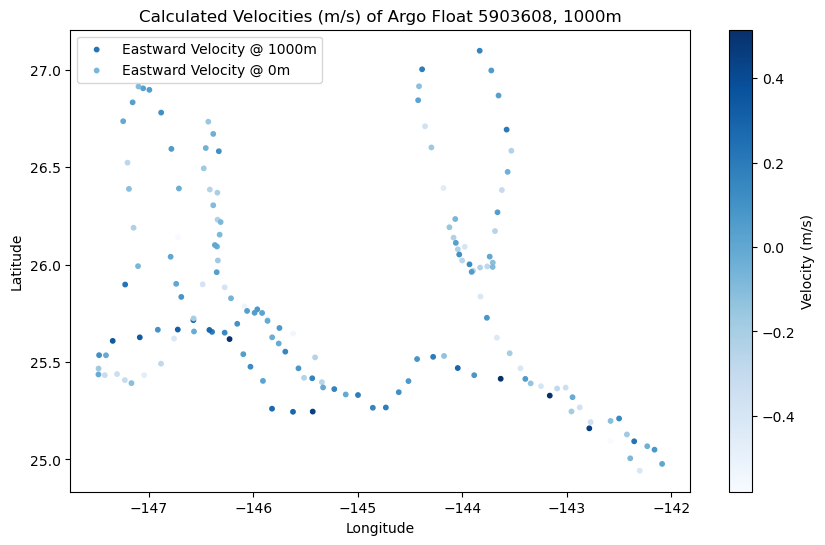

In [5]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data), this is the latitude, longitude, and Eastward Velocity!
longitude_D = ANDROArgoVelocity5903608['Longitude XD']
latitude_D = ANDROArgoVelocity5903608['Latitude YD']
uD_velocity = ANDROArgoVelocity5903608['EastwardVelocityDeep']# Replace with your velocity measurements
vD_velocity = ANDROArgoVelocity5903608['NorthwardVelocityDeep']

longitude_S = ANDROArgoVelocity5903608['Longitude XS1']
latitude_S = ANDROArgoVelocity5903608['Latitude YS2']
uS_velocity = ANDROArgoVelocity5903608['EastwardVelocitySurface1']# Replace with your velocity measurements
vS_velocity = ANDROArgoVelocity5903608['NorthwardVelocitySurface1']

# Create a scatter plot for the first set of points
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(longitude_D, latitude_D, c=uD_velocity, cmap='Blues', s=10, label='Eastward Velocity @ 1000m')
plt.grid()

# Create a scatter plot for the second set of points
###plt.scatter(longitude_D, latitude_D, c=vD_velocity, cmap='Reds', s=10, label='Northward Velocity @ 1000m')
###plt.grid()

# Create a scatter plot for the third set of points
plt.scatter(longitude_S, latitude_S, c=uS_velocity, cmap='Blues', s=10, label='Eastward Velocity @ 0m')
plt.grid()

# Create a scatter plot for the fourth set of points
###plt.scatter(longitude_S, latitude_S, c=vS_velocity, cmap='Reds', s=10, label='Northward Velocity @ 0m')
###plt.grid()

# Create line plots to connect the points
#plt.plot(longitude_D, latitude_D, c=uD_velocity, 'b-', linewidth=0.15)  
#plt.plot(longitude_D, latitude_D, c=vD_velocity, 'r-', linewidth=0.15)  # Surface Velocity

# Add colorbars for each set of points
cbar1 = plt.colorbar(label='Velocity (m/s)')
##cbar2 = plt.colorbar(label='Northward Velocity @1000m')
##cbar3 = plt.colorbar(label='Eastward Velocity @0m')
##cbar4 = plt.colorbar(label='Northward Velocity @0m')

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Calculated Velocities (m/s) of Argo Float 5903608, 1000m')

# Add legend
plt.legend()

# Show the plot
plt.show()

#plt_filename = f'ArgpVelocityGPSEW.png'  # Use a unique identifier (e.g., index 'i') in the filename
#plt.savefig(fig_filename)

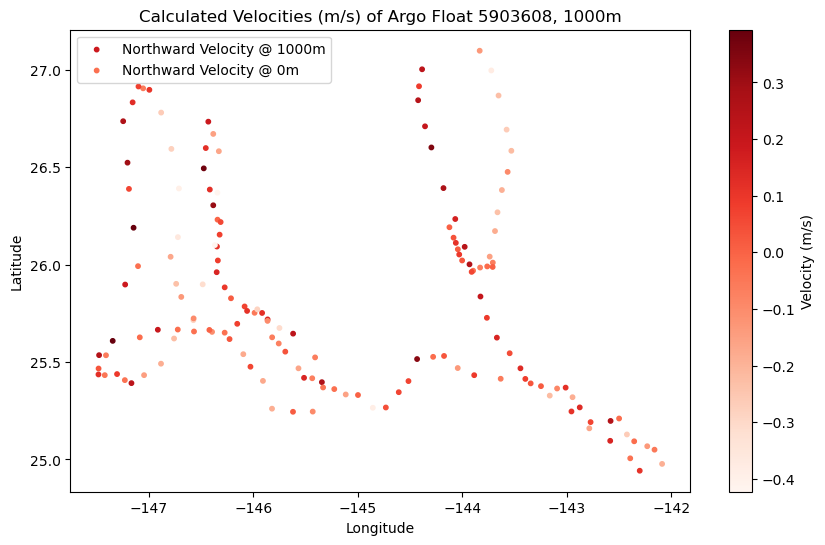

In [6]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data), this is the latitude, longitude, and Eastward Velocity!
longitude_D = ANDROArgoVelocity5903608['Longitude XD']
latitude_D = ANDROArgoVelocity5903608['Latitude YD']
uD_velocity = ANDROArgoVelocity5903608['EastwardVelocityDeep']# Replace with your velocity measurements
vD_velocity = ANDROArgoVelocity5903608['NorthwardVelocityDeep']

longitude_S = ANDROArgoVelocity5903608['Longitude XS1']
latitude_S = ANDROArgoVelocity5903608['Latitude YS2']
uS_velocity = ANDROArgoVelocity5903608['EastwardVelocitySurface1']# Replace with your velocity measurements
vS_velocity = ANDROArgoVelocity5903608['NorthwardVelocitySurface1']

# Create a scatter plot for the first set of points
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
###plt.scatter(longitude_D, latitude_D, c=uD_velocity, cmap='Blues', s=10, label='Eastward Velocity @ 1000m')
###plt.grid()

# Create a scatter plot for the second set of points
plt.scatter(longitude_D, latitude_D, c=vD_velocity, cmap='Reds', s=10, label='Northward Velocity @ 1000m')
plt.grid()

# Create a scatter plot for the third set of points
###plt.scatter(longitude_S, latitude_S, c=uS_velocity, cmap='Blues', s=10, label='Eastward Velocity @ 0m')
###plt.grid()

# Create a scatter plot for the fourth set of points
plt.scatter(longitude_S, latitude_S, c=vS_velocity, cmap='Reds', s=10, label='Northward Velocity @ 0m')
plt.grid()

# Create line plots to connect the points
#plt.plot(longitude_D, latitude_D, c=uD_velocity, 'b-', linewidth=0.15)  
#plt.plot(longitude_D, latitude_D, c=vD_velocity, 'r-', linewidth=0.15)  # Surface Velocity

# Add colorbars for each set of points
cbar1 = plt.colorbar(label='Velocity (m/s)')
##cbar2 = plt.colorbar(label='Northward Velocity @1000m')
##cbar3 = plt.colorbar(label='Eastward Velocity @0m')
##cbar4 = plt.colorbar(label='Northward Velocity @0m')

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Calculated Velocities (m/s) of Argo Float 5903608, 1000m')

# Add legend
plt.legend()

# Show the plot
plt.show()

#plt_filename = f'ArgpVelocityGPSNW.png'  # Use a unique identifier (e.g., index 'i') in the filename
#plt.savefig(fig_filename)

### Calculated Velocities Related to Depth Underwater

Remember extrapolated from geographical location and time of profiling). 

This is for float 5903608 in Region #1 in 2017:

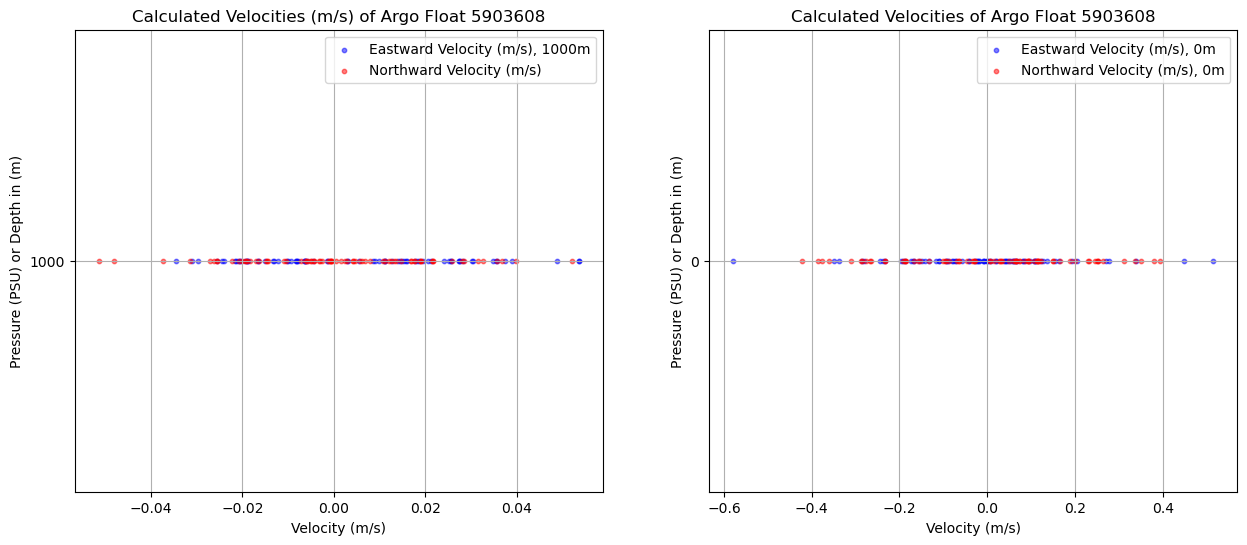

In [7]:
import matplotlib.pyplot as plt

#Limted Y-Axis (Pressure/Depth)
y1_values = [1000]
y2_values = [0]

# Sample data (replace with your actual data), this is the latitude, longitude, and Eastward Velocity!
longitude_D = ANDROArgoVelocity5903608['Longitude XD']
latitude_D = ANDROArgoVelocity5903608['Latitude YD']
uD_velocity = ANDROArgoVelocity5903608['EastwardVelocityDeep']# Replace with your velocity measurements
#yu_errors = ANDROArgoVelocity[
vD_velocity = ANDROArgoVelocity5903608['NorthwardVelocityDeep']
Dpressure = ANDROArgoVelocity5903608['DeepPressure']

longitude_S = ANDROArgoVelocity5903608['Longitude XS1']
latitude_S = ANDROArgoVelocity5903608['Latitude YS2']
uS_velocity = ANDROArgoVelocity5903608['EastwardVelocitySurface1']# Replace with your velocity measurements
vS_velocity = ANDROArgoVelocity5903608['NorthwardVelocitySurface1']
Spressure = ANDROArgoVelocity5903608['SurfacePressure']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(uD_velocity, Dpressure, label='Eastward Velocity (m/s), 1000m', alpha=0.5, s=10, c='b')
ax1.scatter(vD_velocity, Dpressure, label='Northward Velocity (m/s)', alpha=0.5, s=10, c='r')

ax2.scatter(uS_velocity, Spressure, label='Eastward Velocity (m/s), 0m', alpha=0.5, s=10, c='b')
ax2.scatter(vS_velocity, Spressure, label='Northward Velocity (m/s), 0m', alpha=0.5, s=10, c='r')

ax1.set_yticks([1000])  # Replace 'your_desired_value' with the value you want to display
ax2.set_yticks([0])  # Replace 'your_desired_value' with the value you want to display

#plt.scatter(EM_APEX_Vdata_df3["v"], EM_APEX_Vdata_df3["P"], label='v', alpha=0.5, s=.15, c='r')
ax1.set_xlabel('Velocity (m/s)')
ax1.set_ylabel('Pressure (PSU) or Depth in (m)')
ax1.set_title('Calculated Velocities (m/s) of Argo Float 5903608')
ax1.legend()
ax1.grid()
ax1.margins(y=0.000005)

ax2.set_xlabel('Velocity (m/s)')
ax2.set_ylabel('Pressure (PSU) or Depth in (m)')
ax2.set_title('Calculated Velocities of Argo Float 5903608')
ax2.legend()
ax2.grid()


## EM-APEX Velocity Graphs

### Graphing RealTime Velocity Against Depth

Velocity Graph w/ velocity data of ALL three regions.

Text(0.5, 1.0, 'Velocity Graph w/ Depth + Time')

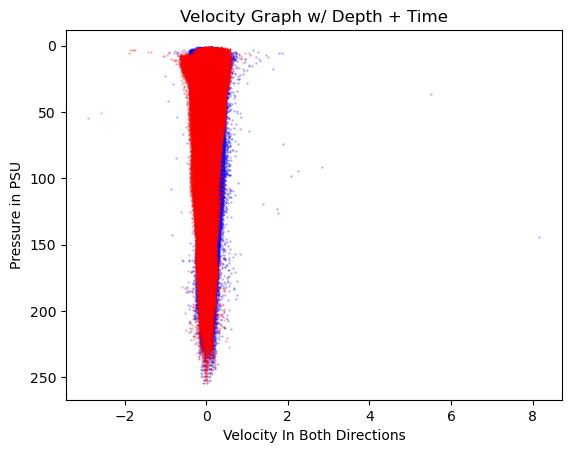

In [8]:
plt.scatter(EM_APEX_Vdata3_df["u"], EM_APEX_Vdata3_df["P"], label='u', alpha=0.5, s=.15, c='b')
plt.scatter(EM_APEX_Vdata3_df["v"], EM_APEX_Vdata3_df["P"], label='v', alpha=0.5, s=.15, c='r')
plt.gca().invert_yaxis()
plt.xlabel('Velocity In Both Directions')
plt.ylabel('Pressure in PSU')
plt.title('Velocity Graph w/ Depth + Time')

#plt.scatter(uD_velocity, Dpressure, label='Eastward Velocity (m/s), 1000m', alpha=0.5, s=10, c='c')
#plt.scatter(vD_velocity, Dpressure, label='Northward Velocity (m/s)', alpha=0.5, s=10, c='k')

#plt.scatter(uS_velocity, Spressure, label='Eastward Velocity (m/s), 0m', alpha=0.5, s=100, c='c')
#plt.scatter(vS_velocity, Spressure, label='Northward Velocity (m/s), 0m', alpha=0.5, s=100, c='k')

Velocity Graph w/ velocity data of Region #1.

Text(0.5, 1.0, 'Velocity Graph w/ Depth + Time')

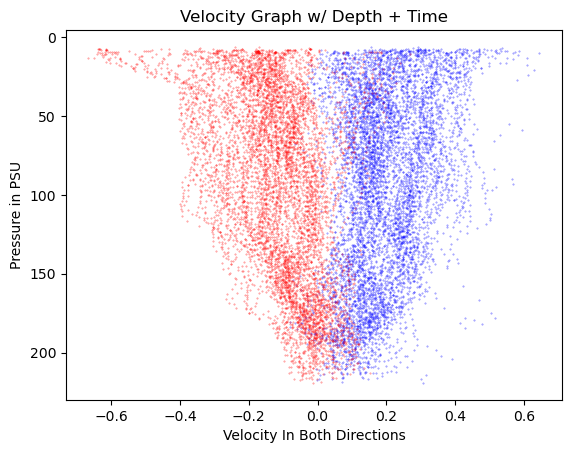

In [9]:
plt.scatter(EM_APEX_Vdata_dfS1["u"], EM_APEX_Vdata_dfS1["P"], label='u', alpha=0.5, s=.15, c='b')
plt.scatter(EM_APEX_Vdata_dfS1["v"], EM_APEX_Vdata_dfS1["P"], label='v', alpha=0.5, s=.15, c='r')
plt.gca().invert_yaxis()
plt.xlabel('Velocity In Both Directions')
plt.ylabel('Pressure in PSU')
plt.title('Velocity Graph w/ Depth + Time')

#plt.scatter(uD_velocity, Dpressure, label='Eastward Velocity (m/s), 1000m', alpha=0.5, s=10, c='c')
#plt.scatter(vD_velocity, Dpressure, label='Northward Velocity (m/s)', alpha=0.5, s=10, c='k')

#plt.scatter(uS_velocity, Spressure, label='Eastward Velocity (m/s), 0m', alpha=0.5, s=100, c='c')
#plt.scatter(vS_velocity, Spressure, label='Northward Velocity (m/s), 0m', alpha=0.5, s=100, c='k')

## EM-APEX & Argo Velocity Graphs Interpolated

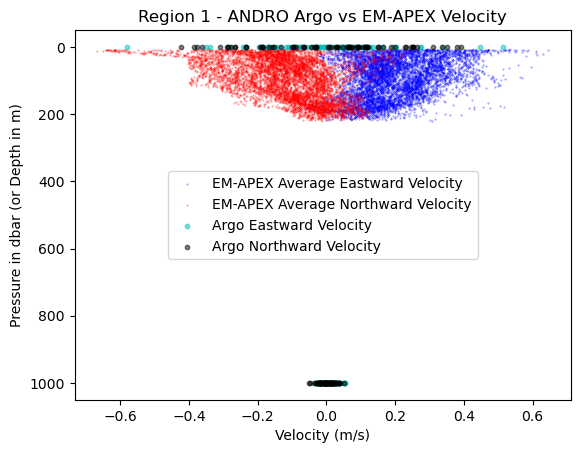

In [10]:
# Sample data (replace with your actual data), this is the latitude, longitude, and Eastward Velocity!
longitude_D = ANDROArgoVelocity5903608['Longitude XD']
latitude_D = ANDROArgoVelocity5903608['Latitude YD']
uD_velocity = ANDROArgoVelocity5903608['EastwardVelocityDeep']# Replace with your velocity measurements
#yu_errors = ANDROArgoVelocity[
vD_velocity = ANDROArgoVelocity5903608['NorthwardVelocityDeep']
Dpressure = ANDROArgoVelocity5903608['DeepPressure']

longitude_S = ANDROArgoVelocity5903608['Longitude XS1']
latitude_S = ANDROArgoVelocity5903608['Latitude YS2']
uS_velocity = ANDROArgoVelocity5903608['EastwardVelocitySurface1']# Replace with your velocity measurements
vS_velocity = ANDROArgoVelocity5903608['NorthwardVelocitySurface1']
Spressure = ANDROArgoVelocity5903608['SurfacePressure']

plt.scatter(EM_APEX_Vdata_dfS1["u"], EM_APEX_Vdata_dfS1["P"], label='EM-APEX Average Eastward Velocity', alpha=0.5, s=.15, c='b')
plt.scatter(EM_APEX_Vdata_dfS1["v"], EM_APEX_Vdata_dfS1["P"], label='EM-APEX Average Northward Velocity', alpha=0.5, s=.15, c='r')
plt.gca().invert_yaxis()
plt.xlabel('Velocity (m/s)')
plt.ylabel('Pressure in dbar (or Depth in m)')
plt.title('Region 1 - ANDRO Argo vs EM-APEX Velocity')

plt.scatter(uD_velocity, Dpressure, label='Argo Eastward Velocity', alpha=0.5, s=10, c='c')
plt.scatter(vD_velocity, Dpressure, label='Argo Northward Velocity', alpha=0.5, s=10, c='k')

plt.scatter(uS_velocity, Spressure, alpha=0.5, s=10, c='c')
plt.scatter(vS_velocity, Spressure, alpha=0.5, s=10, c='k')

plt.legend(loc='center')

#plt_filename = f'VelocityComparison.png'  # Use a unique identifier (e.g., index 'i') in the filename
#plt.savefig(fig_filename)

#min_Evelocity_1000 = ANDROArgoVelocity['EastwardVelocityDeep'].min()
#min_Nvelocity_1000 = ANDROArgoVelocity['NorthwardVelocityDeep'].min()
#max_Evelocity_1000 = ANDROArgoVelocity['EastwardVelocityDeep'].max()
#max_Nvelocity_1000 = ANDROArgoVelocity['NorthwardVelocityDeep'].max()

#min_Evelocity_0 = ANDROArgoVelocity['EastwardVelocityS1'].max()
#min_Nvelocity_0 = ANDROArgoVelocity['NorthwardVelocityS1'].max()
#max_Evelocity_0 = ANDROArgoVelocity['EastwardVelocityS1'].max()
#max_Nvelocity_0 = ANDROArgoVelocity['NorthwardVelocityS1'].max()

#min_Evelocity_EMAPEX = EM_APEX_Vdata_df3['u'].min()
#min_Nvelocity_EMAPEX = EM_APEX_Vdata_df3['v'].min()
#max_Evelocity_EMAPEX = EM_APEX_Vdata_df3['u'].max()
#max_Nvelocity_EMAPEX = EM_APEX_Vdata_df3['v'].max()

#text_plot = f"Min Velocity: {min_lat:.2f}\nMax Lat: {max_lat:.2f}\nMin Lon: {min_lon:.2f}\nMax Lon: {max_lon:.2f}\nMin Time: {min_time}\nMax Time: {max_time}\nWSO Number: {wso_identifier}"
        #ax.text(0.95, 0.05, text_plot, transform=ax.transAxes, ha='right', va='bottom', fontsize=10,
               #bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))